# Árvores II - Tarefa I

![image.png](attachment:f65bd82d-aa56-4cf2-8030-bb758771f332.png)  
[fonte](https://momentum.org/programs-services/manage-your-money/savings-app/pxfuel-creative-commons-zero-cc0-iphone-smartphone-cell-phone-mobile-technology-texting/)

Neste exercício vamos trabalhar com a base de dados de identificação de atividade humana com smartphones. Smartphones possuem acelerômetro e giroscópio, que registram dados de aceleração e giro nos eixos X, Y e Z, com frequencia de 50 Hz (ou seja, 50 registros por segundo). Os dados foram agrupados a medidas de 0.3 Hz, calculando-se variáveis derivadas como aceleração mínima, máxima, média etc por eixo no período agrupado de tempo, resultando em 561 variáveis que podem ser lidas nas bases disponíveis.

A base é oriunda de um experimento, em que os indivíduos realizavam uma de seis atividades corriqueiras:
- andando
- subindo escada
- descendo escada
- parado
- sentado
- deitado

O objetivo é classificar a atividade humana com base nos dados do acelerômetro e giroscópio do celular.

### 1. Carregar a base

Sua primeira atividade é carregar a base.

Ela está disponível neste link:
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

dados https://archive.ics.uci.edu/ml/machine-learning-databases/00240/  
dataset.names https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names  
UCI HAR Dataset.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

Você vai encontrar os seguintes arquivos:

- **features.txt:** contém a lista com os nomes das variáveis
- **features_info.txt:** contém a descrição das variáveis
- **README.txt:** contém uma descrição do estudo e das bases
- **activity_labels:** contém o código da atividade (inteiro entre 1 e 6) e a descrição
- **subject_train.txt:** uma lista indicando que registro pertence a que indivíduo na base de treino
- **X_train.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_train.txt.
- **y_train.txt:** Possui o mesmo número de linhas que X_test. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de treino.
- **subject_test.txt:** uma lista indicando que registro pertence a que indivíduo na base de teste
- **X_test.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_test.txt.
- **y_test.txt:** Possui o mesmo número de linhas que X_train. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de teste.

Carregue as bases:

1. Faça o download dos arquivos.
2. Carregue a base ```features.txt``` em uma *Series* (por exemplo usando o comando ```pd.read_csv()```.
3. Carregue a base subject_train.txt em uma *Series*
4. Carregue a base X_train.txt
    1. Faça com que as colunas deste *dataframe* tenham os nomes indicados em ```features.txt```
    2. Sem alterar a ordem dos *dataframes*, coloque o indicador do indivíduo lido em ```subject_train.txt``` como uma variável a mais neste *dataframe***
    3. Faça com que este *dataframe* tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
5. Com a mesma lógica, carregue a base X_test
    1. Certifique-se de que tenha os nomes lidos em ```features.txt```
    2. Coloque o identificador do sujeito lido em ```subject_test.txt```
    3. Defina um índice duplo composto pela ordem do registro e o identificador do registro
6. Salve as bases em arquivos CSV para facilitar a leitura deles na terefa 2 deste módulo
7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

**OBS:** As bases já estão divididas em treino e teste, de modo que não vamos precisar da função ```train_test_split```.

In [ ]:
#carregando as bibliotecas
from google.colab import drive

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

In [ ]:
# conectando com o drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#carregando os datasets
features = pd.read_csv('/content/drive/MyDrive/Ebac/Profissão: Cientista de dados/Ciência de dados/Módulo 17/Ex 1/UCI HAR Dataset/UCI HAR Dataset/features.txt', sep=' ', header=None, usecols=[1])
subject_train = pd.read_csv('/content/drive/MyDrive/Ebac/Profissão: Cientista de dados/Ciência de dados/Módulo 17/Ex 1/UCI HAR Dataset/UCI HAR Dataset/train/subject_train.txt', sep=' ', header=None)
X_train = pd.read_csv('/content/drive/MyDrive/Ebac/Profissão: Cientista de dados/Ciência de dados/Módulo 17/Ex 1/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', header=None, delim_whitespace=True)

In [ ]:
# Fazendo com que a coluna do X_train tenha o nome de features
X_train.columns = features[1]

In [ ]:
#alterando o nome da coluna de subject_train
subject_train.rename(columns={0: 'subject'}, inplace=True)

# adicionando subject_train ao dataframe
X_train_subject = pd.concat([X_train, subject_train], axis=1)

# Define uma nova coluna com a ordem dos dados
X_train['indice'] = range(1, len(X_train) + 1)

#fazendo com que haja um indice duplo
X_train = X_train.set_index(['indice'], 1)

<ipython-input-21-53d98aaf6bfa>:11: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  X_train = X_train.set_index(['indice'], 1)


In [ ]:
# fazendo o mesmo para X_teste
# carregando os dados
X_test = pd.read_csv('/content/drive/MyDrive/Ebac/Profissão: Cientista de dados/Ciência de dados/Módulo 17/Ex 1/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt', header=None, delim_whitespace=True)
subject_test = pd.read_csv('/content/drive/MyDrive/Ebac/Profissão: Cientista de dados/Ciência de dados/Módulo 17/Ex 1/UCI HAR Dataset/UCI HAR Dataset/test/subject_test.txt', sep=' ', header=None)

# Fazendo com que a coluna do X_test tenha o nome de features
X_test.columns = features[1]

#alterando o nome da coluna de subject_test
subject_test.rename(columns={0: 'subject teste'}, inplace=True)

# adicionando subject_train ao dataframe
X_test_subject = pd.concat([X_test, subject_test], axis=1)

# Define uma nova coluna com a ordem dos dados
X_test['indice'] = range(1, len(X_test) + 1)

# adição de um indice duplo
X_test = X_test.set_index(['indice'], 1)

<ipython-input-22-47c0f91eb568>:19: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only.
  X_test = X_test.set_index(['indice'], 1)


In [ ]:
# baixando novos arquivos e transformando em csv (utilizando apenas as três primeiras colunas do dataset)
X_test.to_csv('X_test_new.csv')
X_train.to_csv('X_train_new.csv')

### 2. Ajustar uma árvore de decisão

- 2.1 ajuste uma árvore de decisão com número mínimo de observações por folha = 20. Certifique-se de que você esteja utilizando apenas as 3 variáveis indicadas no exercício anterior.
- 2.2 Calcule os ccp_alphas. Como feito em aula, certifique-se de que todos os valores são positivos, e selecione apenas valores únicos.
- 2.3 Considere que vamos fazer uma árvore para cada valor de ```ccp_alpha```. Para ter um pouco mais de velocidade, crie uma coleção de dados com os ```ccp_alphas```, considerando apenas 1 a cada 5 valores. Dica: utilize o slicing do tipo ```array[::5]``` para isto. Caso se sinta seguro, fique à vontade para utilizar mais valores de ```ccp_alpha```.

In [ ]:
# carregando o novo arquivo CSV
X_test = pd.read_csv('/content/X_test_new.csv')
X_train = pd.read_csv('/content/X_train_new.csv')
# carregando a variável resposta
y_train = pd.read_csv('/content/drive/MyDrive/Ebac/Profissão: Cientista de dados/Ciência de dados/Módulo 17/Ex 1/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', header=None, names=['action'])
y_test = pd.read_csv('/content/drive/MyDrive/Ebac/Profissão: Cientista de dados/Ciência de dados/Módulo 17/Ex 1/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt', header=None, names=['action'])

In [ ]:
# Filtrando apenas as 3 variáveis exigidas pelo exercício
X_test = X_test[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']]
X_train = X_train[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']]

In [ ]:
%%time
# montando a árvore de decisão
# Consultado o exemplo do site https://velog.io/@jiselectric/Decision-Tree-to-Classify-Human-Activity

dt_clf = DecisionTreeClassifier(max_depth=20, random_state=42)
dt_clf.fit(X_train, y_train)


pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print(f'Acurácia da DecisionTreeClassifier : {accuracy:.4f} \n')

Acurácia da DecisionTreeClassifier : 0.3777 

CPU times: user 55.9 ms, sys: 2.93 ms, total: 58.8 ms
Wall time: 58.6 ms


In [ ]:
# avaliando os ccp_alphas
caminho = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

In [ ]:
# deixando apenas valores unicos, maiores que 0 e selecionando 1 em cada 5 valores
unique_values = np.unique(ccp_alphas)
ccp_alphas = unique_values[unique_values > 0][::5]

### 3. Desempenho da árvore por ccp_alpha

- 3.1: Rode uma árvore para cada ```ccp_alpha```, salvando cada árvore em uma lista
- 3.2: Calcule a acurácia de cada árvore na base de treinamento e de teste
- 3.3: Monte um gráfico da acurácia em função do ```ccp_alpha``` na base de validação e na base de teste
- 3.4: Selecione a melhor árvore como sendo aquela que possui melhor acurácia na base de teste
- 3.5: Qual a melhor acurácia que se pode obter com estas três variáveis?

**Dica:** utilize a estrutura do notebook apresentado em aula.  
**Dica 2:** meça o tempo com a função mágica ```%%time``` na primeira linha da célula.  
**Sugestão:** caso fique confortável com o tempo de execução, faça a busca pelo melhor ```ccp_alpha``` com mais iterações.  
**Sugestão 2:** caso fique confortável com o tempo de execução, tente inserir uma ou mais variáveis adicionais e veja se consegue aumentar a acurácia.

In [ ]:
# gerando uma lista com os valores de cada árvore
%%time
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha).fit(X_train, y_train)
    clfs.append(clf)

CPU times: user 14.2 s, sys: 8.65 ms, total: 14.2 s
Wall time: 15.2 s


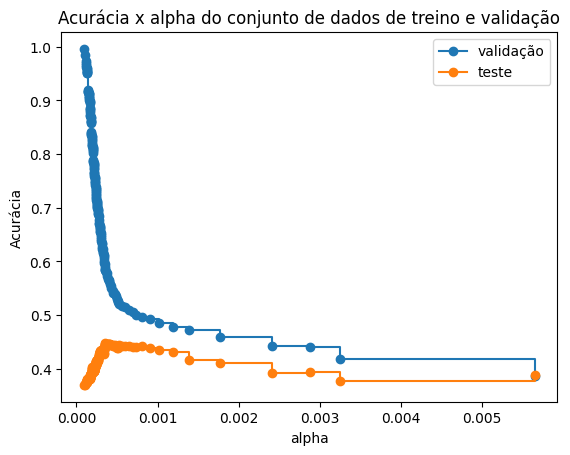

CPU times: user 2.08 s, sys: 102 ms, total: 2.19 s
Wall time: 2.09 s


In [ ]:
%%time
# calculando a acuracia e plotando ela em um gráfico
train_scores = [clf.score(X_train, y_train) for clf in clfs]
valid_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="validação",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
ind_melhor_arvore = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de validação: {valid_scores[ind_melhor_arvore]*100:.2f}')

melhor_arvore

Acurácia da melhor árvore na base de validação: 44.79


DecisionTreeClassifier(ccp_alpha=0.0003556123268507218, random_state=42)

Acurácia: 44.79


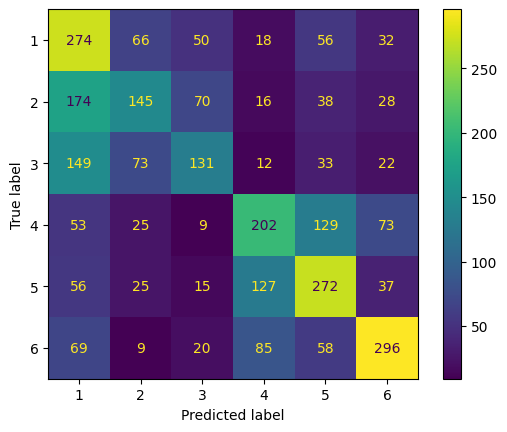

In [ ]:
acuracia_teste = melhor_arvore.score(X_test, y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}')
ConfusionMatrixDisplay.from_estimator(melhor_arvore, X_test, y_test)